# Modelo estatístico de previsão de chuva

**Sala: 2A**

**Grupo:**
> Breno Marti

> Diogo Cintra

> João Pedro Chacon Ruiz

> Luiz Felipe Valente

___
## • Imports

Importando as devidas funções para que se possa fazer a análise e filtragem dos dados, bem como a implementação do modelo de regrassão multipla.

In [23]:
#Importando as bibliotecas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
from numpy import percentile
import numpy as np
from pandas import DataFrame
from scipy.stats import probplot
import statsmodels.api as sm

## • Início da análise exploratória

Antes que se possa partir para a emplementação de qualquer modelo de previsão é necessário, primeiramente,  que se entenda como os dados se comportam e, caso preciso, manipulá-los, de forma a facilitar a construção do modelo, mas sem comprometer seus conteúdos.

In [24]:
dados1 = pd.read_excel('macapa.xlsx')
dados1.head();

In [25]:
datas = dados1.data
horas = dados1.hora

In [26]:
concat = []
for e in range(len(datas)):
    #concat.append(datas[e] + ',' + horas[e])
    d = datas[e]
    d = d.replace(hour=horas[e], minute=0, second=0)
    concat.append(d)
    
#print(concat)
dia_hora = pd.DataFrame(concat)

Rodar apenas uma vez a o código abaixo

In [27]:
dados1.insert(0,'time', dia_hora, True);
dados_2 = dados1.drop(['data', 'hora'], axis=1)
dados2 = dados1.drop(['data', 'hora'], axis=1)
dados_3 = dados_2.set_index("time")
dados_4 = dados_3.dropna();
dados3 = dados2.dropna();

In [28]:
dados3.head()

,time,codigo_estacao,temp_inst,temp_max,temp_min,umid_inst,umid_max,umid_min,pto_orvalho_inst,pto_orvalho_max,pto_orvalho_min,pressao,pressao_max,pressao_min,vento_direcao,vento_vel,vento_rajada,radiacao,precipitacao
2,2019-01-29 19:00:00,A249,32.0,32.4,31.4,56,58.0,55.0,22.3,22.8,21.7,1007.0,1007.7,1007.0,3.9,213.0,8.6,2444.0,0.0
4,2019-01-30 19:00:00,A249,31.0,31.8,30.1,62,65.0,46.0,22.8,22.9,18.1,1007.6,1008.0,1007.5,3.8,208.0,7.3,2291.0,0.0
6,2019-02-08 18:00:00,A249,24.6,24.8,24.1,93,93.0,93.0,23.5,23.7,22.9,1007.6,1008.7,1007.6,0.8,143.0,3.0,481.7,1.0
7,2019-02-08 22:00:00,A249,25.3,25.7,25.3,91,91.0,89.0,23.8,23.8,23.7,1006.7,1006.7,1006.6,0.4,150.0,1.8,45.8,0.0
8,2019-02-08 17:00:00,A249,24.1,24.5,24.0,93,93.0,93.0,22.9,23.3,22.8,1008.7,1009.6,1008.7,1.3,193.0,5.0,384.3,2.4


In [29]:
dados_4.head()

,codigo_estacao,temp_inst,temp_max,temp_min,umid_inst,umid_max,umid_min,pto_orvalho_inst,pto_orvalho_max,pto_orvalho_min,pressao,pressao_max,pressao_min,vento_direcao,vento_vel,vento_rajada,radiacao,precipitacao
time,,,,,,,,,,,,,,,,,,
2019-01-29 19:00:00,A249,32.0,32.4,31.4,56,58.0,55.0,22.3,22.8,21.7,1007.0,1007.7,1007.0,3.9,213.0,8.6,2444.0,0.0
2019-01-30 19:00:00,A249,31.0,31.8,30.1,62,65.0,46.0,22.8,22.9,18.1,1007.6,1008.0,1007.5,3.8,208.0,7.3,2291.0,0.0
2019-02-08 18:00:00,A249,24.6,24.8,24.1,93,93.0,93.0,23.5,23.7,22.9,1007.6,1008.7,1007.6,0.8,143.0,3.0,481.7,1.0
2019-02-08 22:00:00,A249,25.3,25.7,25.3,91,91.0,89.0,23.8,23.8,23.7,1006.7,1006.7,1006.6,0.4,150.0,1.8,45.8,0.0
2019-02-08 17:00:00,A249,24.1,24.5,24.0,93,93.0,93.0,22.9,23.3,22.8,1008.7,1009.6,1008.7,1.3,193.0,5.0,384.3,2.4


## Definindo as variáveis que vamos estudar 

A partir de estudos e leitura de papeis sobre o tema, as seguintes variáveis foram, repetidamente, dadas como as mais relevantes: temperatura, umidade, pressão atmosférica e velociadade do vento. Com base nessas pesquisas, estas mesmas foram tomadas como variáveis independentes do modelo de regressão linear múltipla.

In [30]:
dados_4.precipitacao = dados_4.precipitacao.replace('////', 0.0)

/Users/joaopedrochacon/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [31]:
dados_4 = dados_4[['temp_inst','pressao','umid_inst','precipitacao','vento_vel']].astype('float')

In [78]:
#dados_5 = dados_4.astype(float)
dados_log = np.log(dados_4[['temp_inst','pressao','umid_inst','precipitacao','vento_vel']])

dados4 = dados3.transpose()
dados5 = dados4.loc[['time','temp_inst', 'pressao','umid_inst', 'precipitacao','vento_vel']]
dados6 = dados5.transpose()
dados6 = dados6.sort_values(by='time')
dados6 = dados6.reset_index()
del dados6['index']
d = dados6.dropna()

/Users/joaopedrochacon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [79]:
data = []
hora = []

for coisas in d.time.astype(str):
    teste = coisas.split()
    data.append(teste[0])
    horas = teste[1]
    hora.append(horas[0:2])

In [80]:
len(data)

3168

In [81]:
final = []

anterior = data[0]
a=0
day = 0
for dia in data:
    if a < 3167:
        if data[a+1] == anterior:
            final.append(day)
        else:
            final.append(day)
            day += 1
            anterior = data[a+1]
    a += 1
final.append(250)

In [82]:
hora = pd.Series(hora).astype(int) 
final = pd.Series(final).astype(int)

In [83]:
d['horas'] = hora
d['dias'] = final

## Criando as colunas de seno e de cosseno tanto das horas quanto dos dias para dar ao modelo a ideia de que são variáveis cíclicas

Estas variáveis foram criadas para representar a sazonalidade nos períodos de chuva, a fim de aumentar a precisão do modelo, que agora será capaz de distinguir as diferentes estações do ano.

In [84]:
d['hora_seno'] = np.sin(2*np.pi*hora/24)
d['hora_cosseno'] = np.cos(2*np.pi*hora/24)

In [85]:
d['dia_seno'] = np.sin(2*np.pi*final/365.25)
d['dia_cosseno'] = np.cos(2*np.pi*final/365.25)
d.head()

,time,temp_inst,pressao,umid_inst,precipitacao,vento_vel,horas,dias,hora_seno,hora_cosseno,dia_seno,dia_cosseno
0,2019-01-29 19:00:00,32,1007,56,0.0,213,19,0,-0.965926,0.258819,0.000000,1.000000
1,2019-01-30 19:00:00,31,1007.6,62,0.0,208,19,1,-0.965926,0.258819,0.017202,0.999852
2,2019-02-08 15:00:00,24.6,1010.2,93,0.8,203,15,2,-0.707107,-0.707107,0.034398,0.999408
3,2019-02-08 16:00:00,24.4,1009.6,93,3.2,190,16,2,-0.866025,-0.500000,0.034398,0.999408
4,2019-02-08 17:00:00,24.1,1008.7,93,2.4,193,17,2,-0.965926,-0.258819,0.034398,0.999408


## Organização de DataFrames

> Estes são feitos a fim de possibilitar a análise do evento a partir dos dados advindos das horas que o precedem e do instante em sí

In [86]:
dados6 = d.set_index('time')
dados7 = dados6[['temp_inst','pressao','umid_inst','precipitacao','vento_vel']]

In [87]:
dados7.precipitacao = dados7.precipitacao.replace('////', 0.0)

/Users/joaopedrochacon/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [88]:
D = dados7.astype(float)
D.head()

,temp_inst,pressao,umid_inst,precipitacao,vento_vel
time,,,,,
2019-01-29 19:00:00,32.0,1007.0,56.0,0.0,213.0
2019-01-30 19:00:00,31.0,1007.6,62.0,0.0,208.0
2019-02-08 15:00:00,24.6,1010.2,93.0,0.8,203.0
2019-02-08 16:00:00,24.4,1009.6,93.0,3.2,190.0
2019-02-08 17:00:00,24.1,1008.7,93.0,2.4,193.0


In [89]:
t = [] #hora de chuva
t1 = [] #uma hora anterior
t2 = [] #duas horas anteriores
t3 = [] #tres horas anteriores
t4 = [] #quatro horas anteriores

for e in range(len(D)):
    
    if D['precipitacao'][e]>0 and D['precipitacao'][e-1]==0 and D['precipitacao'][e-2]==0 and D['precipitacao'][e-3]==0 and D['precipitacao'][e-4]==0:
        t.append(D.iloc[e])
        t1.append(D.iloc[e-1])
        t2.append(D.iloc[e-2])
        t3.append(D.iloc[e-3])
        t4.append(D.iloc[e-4])

# Guardando as listas como DataFrames
T = pd.DataFrame(t)
T1 = pd.DataFrame(t1)
T2 = pd.DataFrame(t2)
T3 = pd.DataFrame(t3)
T4 = pd.DataFrame(t4)

# Renomeando as colunas de todos estes DataFrames -  0 Horas
T.rename(columns={'temp_inst':'temperatura_t'}, inplace=True)
T.rename(columns={'pressao':'pressao_t'}, inplace=True)
T.rename(columns={'umid_inst':'umidade_t'}, inplace=True)
T.rename(columns={'precipitacao':'precipitacao_t'}, inplace=True)
T.rename(columns={'vento_vel':'vento_t'}, inplace=True)
T[['temperatura_t', 'pressao_t', 'umidade_t','precipitacao_t','vento_t']].astype(float);

# Renomeando as colunas de todos estes DataFrames -  1 Hora atrás
T1.rename(columns={'temp_inst':'temperatura_t1'}, inplace=True)
T1.rename(columns={'pressao':'pressao_t1'}, inplace=True)
T1.rename(columns={'umid_inst':'umidade_t1'}, inplace=True)
T1.rename(columns={'precipitacao':'precipitacao_t1'}, inplace=True)
T1.rename(columns={'vento_vel':'vento_t1'}, inplace=True)
T1[['temperatura_t1', 'pressao_t1', 'umidade_t1','precipitacao_t1','vento_t1']].astype(float);

# Renomeando as colunas de todos estes DataFrames -  2 Horas atrás
T2.rename(columns={'temp_inst':'temperatura_t2'}, inplace=True)
T2.rename(columns={'pressao':'pressao_t2'}, inplace=True)
T2.rename(columns={'umid_inst':'umidade_t2'}, inplace=True)
T2.rename(columns={'precipitacao':'precipitacao_t2'}, inplace=True)
T2.rename(columns={'vento_vel':'vento_t2'}, inplace=True)
T2[['temperatura_t2', 'pressao_t2', 'umidade_t2','precipitacao_t2','vento_t2']].astype(float);

# Renomeando as colunas de todos estes DataFrames -  3 Horas atrás
T3.rename(columns={'temp_inst':'temperatura_t3'}, inplace=True)
T3.rename(columns={'pressao':'pressao_t3'}, inplace=True)
T3.rename(columns={'umid_inst':'umidade_t3'}, inplace=True)
T3.rename(columns={'precipitacao':'precipitacao_t3'}, inplace=True)
T3.rename(columns={'vento_vel':'vento_t3'}, inplace=True)
T3[['temperatura_t3', 'pressao_t3', 'umidade_t3','precipitacao_t3','vento_t3']].astype(float);

# Renomeando as colunas de todos estes DataFrames -  4 Horas atrás
T4.rename(columns={'temp_inst':'temperatura_t4'}, inplace=True)
T4.rename(columns={'pressao':'pressao_t4'}, inplace=True)
T4.rename(columns={'umid_inst':'umidade_t4'}, inplace=True)
T4.rename(columns={'precipitacao':'precipitacao_t4'}, inplace=True)
T4.rename(columns={'vento_vel':'vento_t4'}, inplace=True)
T4[['temperatura_t4', 'pressao_t4', 'umidade_t4','precipitacao_t4','vento_t4']].astype(float);

# Observação

### É crucial explicitar que, desta forma, o modelo fará a previsão da quantidade de chuva dado os valores  passados e dado o fato de que haverá uma chuva no fim da janela analisada. Isso significa que ele não prevê a chuva em um cenário geral, mas somente nos casos em que se sabe que uma chuva irá cair ou já esteja caindo.

## Selecionando a variação das variáveis

É válido que se preste devida atenção à variação nas variáveis além de seus valores em sí. Um exemplo desta mudança na forma de análise explica como uma temperatura baixa no verâo, provavelmente causada por uma frente fria, geralmente acompanha chuva, enquanto temperaturas baixas no inverno não fornecem um indicativo tão convincente. Na mesma lógica, uma queda ou aumento na pressão significam muito mais que seus valores por se só.

In [90]:
temp = []
umid = []
pres = []
vel = []
preci = []

for e in range(len(T)):
    
    temp.append(abs((T['temperatura_t'][e])-(T3['temperatura_t3'][e])))
    umid.append(abs((T['umidade_t'][e])-(T3['umidade_t3'][e])))
    pres.append(T3['pressao_t3'][e])
    vel.append(T3['vento_t3'][e])
    preci.append(T['precipitacao_t'][e])    
       
Temp = pd.DataFrame(temp)
Umid = pd.DataFrame(umid)
Pres = pd.DataFrame(pres)
Vel = pd.DataFrame(vel)
Preci = pd.DataFrame(preci)

Temp.rename(columns={0:'temperatura_t'}, inplace=True)
Umid.rename(columns={0:'umidade_t'}, inplace=True)
Pres.rename(columns={0:'pressao_t'}, inplace=True)
Vel.rename(columns={0:'vento_t'}, inplace=True)
Preci.rename(columns={0:'precipitacao_t'}, inplace=True)
precipita = Preci['precipitacao_t'].astype(float)

a = Temp.join(Umid)
b = Vel.join(Pres)
c = b.join(precipita)
variacao = a.join(c)
variacao.dropna();

#### Correlação entre a variação das VI (variáveis independentes) e a VD (variável dependente)

In [91]:
np.log10(variacao['precipitacao_t']).corr((variacao['umidade_t']))

0.24453112611206845

In [92]:
np.log10(variacao['precipitacao_t']).corr((variacao['temperatura_t']))

0.2716273533567429

In [93]:
np.log10(variacao['precipitacao_t']).corr((variacao['pressao_t']))

0.050820720192216125

In [94]:
np.log10(variacao['precipitacao_t']).corr((variacao['vento_t']))

-0.022304725729274288

### Análise para que se possa escolher a melhor hora a ser usada para que se faça a previsão

Obs: o valor de t é referente ao tempo no qual os dados foram obtidos em relação ao horário de precipitação; 

t, t1, t2, t3, t4 representam 0, 1, 2, 3 e 4 horas atrás, respectivamente

> Correlação entre os dados de umidade nas horas anteriores com os dados de precipitação

In [95]:
print('Correlação entre precipitação e umidade na hora exata:',np.log10(T['precipitacao_t']).corr(T['umidade_t']))

Correlação entre precipitação e umidade na hora exata: 0.4266262462667984


In [96]:
print('Correlação entre precipitação e umidade uma hora antes:',np.log10(T['precipitacao_t']).corr(T1['umidade_t1']))

Correlação entre precipitação e umidade uma hora antes: nan


In [97]:
print('Correlação entre precipitação e umidade duas horas antes:',np.log10(T['precipitacao_t']).corr(T2['umidade_t2']))

Correlação entre precipitação e umidade duas horas antes: nan


In [98]:
print('Correlação entre precipitação e umidade três horas antes:',np.log10(T['precipitacao_t']).corr(T3['umidade_t3']))

Correlação entre precipitação e umidade três horas antes: nan


In [99]:
print('Correlação entre precipitação e umidade quatro horas antes:',np.log10(T['precipitacao_t']).corr(T4['umidade_t4']))

Correlação entre precipitação e umidade quatro horas antes: nan


> Correlação entre os dados de temperatura nas horas anteriores com os dados de precipitação

In [100]:
print('Correlação entre precipitação e temperatura na hora exata:',np.log10(T['precipitacao_t']).corr(T['temperatura_t']))

Correlação entre precipitação e temperatura na hora exata: -0.3955921574076909


In [101]:
print('Correlação entre precipitação e temperatura uma hora antes:',np.log10(T['precipitacao_t']).corr(T1['temperatura_t1']))

Correlação entre precipitação e temperatura uma hora antes: nan


In [102]:
print('Correlação entre precipitação e temperatura duas horas antes:',np.log10(T['precipitacao_t']).corr(T2['temperatura_t2']))

Correlação entre precipitação e temperatura duas horas antes: nan


In [103]:
print('Correlação entre precipitação e temperatura três horas antes:',np.log10(T['precipitacao_t']).corr(T3['temperatura_t3']))

Correlação entre precipitação e temperatura três horas antes: nan


In [104]:
print('Correlação entre precipitação e temperatura quatro horas antes:',np.log10(T['precipitacao_t']).corr(T4['temperatura_t4']))

Correlação entre precipitação e temperatura quatro horas antes: nan


> Correlação entre os dados de pressão atmosférica nas horas anteriores com os dados de precipitação

In [105]:
print('Correlação entre precipitação e pressão atmosférica na hora exata:',np.log10(T['precipitacao_t']).corr(T['pressao_t']))

Correlação entre precipitação e pressão atmosférica na hora exata: 0.02184955680145


In [106]:
print('Correlação entre precipitação e pressão atmosférica uma hora antes:',np.log10(T['precipitacao_t']).corr(T1['pressao_t1']))

Correlação entre precipitação e pressão atmosférica uma hora antes: nan


In [107]:
print('Correlação entre precipitação e pressão atmosférica duas horas antes:',np.log10(T['precipitacao_t']).corr(T2['pressao_t2']))

Correlação entre precipitação e pressão atmosférica duas horas antes: nan


In [108]:
print('Correlação entre precipitação e pressão atmosférica três horas antes:',np.log10(T['precipitacao_t']).corr(T3['pressao_t3']))

Correlação entre precipitação e pressão atmosférica três horas antes: nan


In [109]:
print('Correlação entre precipitação e pressão atmosférica quatro horas antes:',np.log10(T['precipitacao_t']).corr(T4['pressao_t4']))

Correlação entre precipitação e pressão atmosférica quatro horas antes: nan


> Correlação entre os dados de velocidade do vento nas horas anteriores com os dados de precipitação

In [110]:
print('Correlação entre pressão e velocidade do vento na hora exata:',np.log10((T['precipitacao_t'])).corr(T['vento_t']))

Correlação entre pressão e velocidade do vento na hora exata: 0.030962837547650533


In [111]:
print('Correlação entre pressão e velocidade do vento uma hora antes:',np.log10((T['precipitacao_t'])).corr(T1['vento_t1']))

Correlação entre pressão e velocidade do vento uma hora antes: nan


In [112]:
print('Correlação entre pressão e velocidade do vento duas horas antes:',np.log10((T['precipitacao_t'])).corr(T2['vento_t2']))

Correlação entre pressão e velocidade do vento duas horas antes: nan


In [113]:
print('Correlação entre pressão e velocidade do vento três horas antes:',np.log10((T['precipitacao_t'])).corr(T3['vento_t3']))

Correlação entre pressão e velocidade do vento três horas antes: nan


In [114]:
print('Correlação entre pressão e velocidade do vento quatro horas antes:',np.log10((T['precipitacao_t'])).corr(T4['vento_t4']))

Correlação entre pressão e velocidade do vento quatro horas antes: nan


 A partir das análises feitas nessas células pode-se concluir que a hora t3, ou seja, 3 horas antes do ocorrido, mostra uma correlação consistentemente maior que as outras faixas de tempo

___
## Analisando os dias que tiveram chuvas

### Análise com log

In [115]:
dados_log_com_chuva = dados_log[dados_log['precipitacao']>0]
dados_log_com_chuva.head()

,temp_inst,pressao,umid_inst,precipitacao,vento_vel
time,,,,,
2019-02-08 17:00:00,3.182212,6.916418,4.532599,0.875469,5.262690
2019-02-08 16:00:00,3.194583,6.917309,4.532599,1.163151,5.247024
2019-02-09 15:00:00,3.226844,6.917508,4.532599,0.955511,4.983607
2019-02-09 14:00:00,3.206803,6.918003,4.532599,0.875469,5.214936
2019-02-09 13:00:00,3.210844,6.917706,4.532599,1.223775,5.204007


In [116]:
temperatura1_log = dados_log_com_chuva['temp_inst']
pressao1_log = dados_log_com_chuva['pressao']
umidade1_log = dados_log_com_chuva['umid_inst']
precipitacao1_log = dados_log_com_chuva['precipitacao']

### Análise de correlação entre variáveis independentes

Uma grande correlação entre variáveis independentes comprometem a análise por serem redundantes entre sí, impedindo que o algoritmo atribua valores relevantes às mesmas variáveis

Scatter plots a fim de facilitar a visualização da correlação entre as variáveis

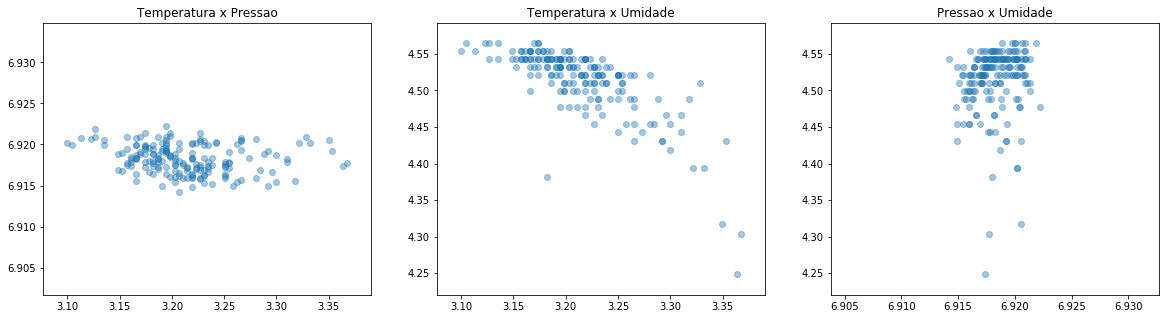

In [117]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20, 5) 
axs[0].scatter(temperatura1_log,pressao1_log, alpha=0.4);
axs[0].set_title('Temperatura x Pressao');
axs[1].scatter(temperatura1_log,umidade1_log, alpha=0.4);
axs[1].set_title('Temperatura x Umidade');
axs[2].scatter(pressao1_log,umidade1_log, alpha=0.4);
axs[2].set_title('Pressao x Umidade');

### Análise sem log

Novamente, se trata de uma análise a fim de selecionar variáveis independentes que de fato contribuam com o modelo

In [118]:
dados7 = dados7.reset_index()
dados_com_chuva = dados7[dados7['precipitacao'].astype(float)>0]
dados_com_chuva.head()

,time,temp_inst,pressao,umid_inst,precipitacao,vento_vel
2,2019-02-08 15:00:00,24.6,1010.2,93,0.8,203
3,2019-02-08 16:00:00,24.4,1009.6,93,3.2,190
4,2019-02-08 17:00:00,24.1,1008.7,93,2.4,193
5,2019-02-08 18:00:00,24.6,1007.6,93,1.0,143
13,2019-02-09 13:00:00,24.8,1010,93,3.4,182


In [119]:
tempo1 = dados_com_chuva['time']
temperatura1 = dados_com_chuva['temp_inst']
pressao1 = dados_com_chuva['pressao']
umidade1 = dados_com_chuva['umid_inst']
precipitacao1 = dados_com_chuva['precipitacao']

temperatura1 = temperatura1.astype(float)
umidade1 = umidade1.astype(float)
pressao1 = pressao1.astype(float)
precipitacao1 = precipitacao1.astype(float)

temperatura1_log = temperatura1_log.astype(float)
umidade1_log = umidade1_log.astype(float)
pressao1_log = pressao1_log.astype(float)
precipitacao1_log = precipitacao1_log.astype(float)

Scatter plots das variáveis independentes, que passam uma imagem visual da correlação entre elas

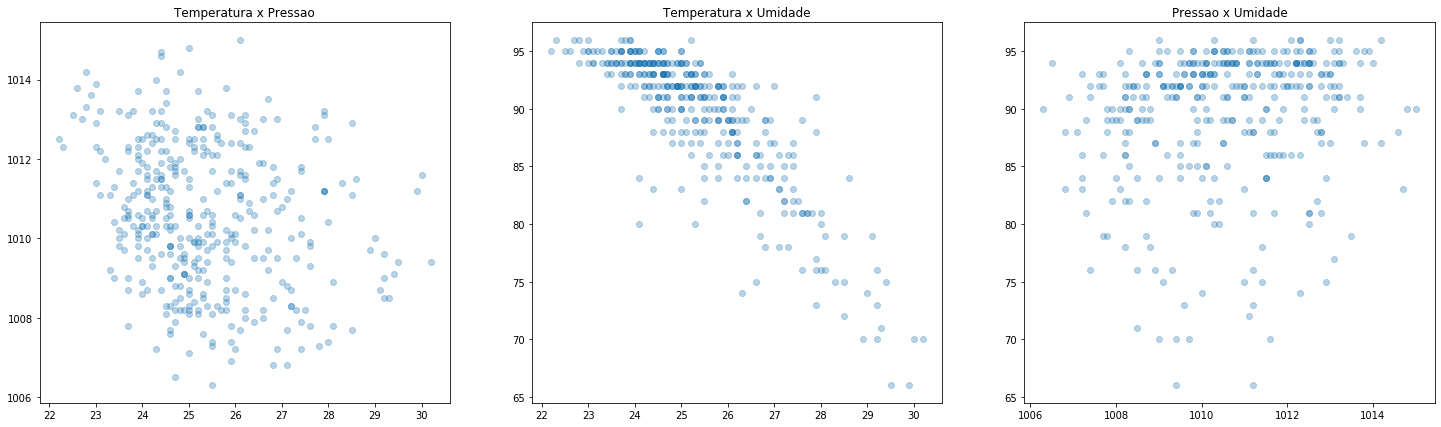

In [183]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(25, 7) 
axs[0].scatter(temperatura1,pressao1, alpha=0.3);
axs[0].set_title('Temperatura x Pressao');
axs[1].scatter(temperatura1,umidade1, alpha=0.3);
axs[1].set_title('Temperatura x Umidade');
axs[2].scatter(pressao1,umidade1, alpha=0.3);
axs[2].set_title('Pressao x Umidade');

### Correlação entre as variáveis independentes

Cálculo do valor númerico das correlações entre as variáveis independentes

> Sem uso de log

In [121]:
print('Correlação entre temperatura e pressão:', temperatura1.corr(pressao1))
print('Correlação entre temperatura e umidade:', temperatura1.corr(umidade1))
print('Correlação entre pressão e umidade:',pressao1.corr(umidade1))

Correlação entre temperatura e pressão: -0.23549984017938178
Correlação entre temperatura e umidade: -0.8449678271003968
Correlação entre pressão e umidade: 0.16198840360542682


> Com uso de log

In [122]:
print('Correlação entre temperatura e pressão:', np.log10(temperatura1).corr(pressao1))
print('Correlação entre temperatura e umidade:', np.log10(temperatura1).corr(umidade1))
print('Correlação entre pressão e umidade:',np.log10(pressao1).corr(umidade1))

Correlação entre temperatura e pressão: -0.24089658479603426
Correlação entre temperatura e umidade: -0.8358342152650253
Correlação entre pressão e umidade: 0.16203262500892351


O uso de logaritmos nos valores das variáveis ajuda, em certos casos, a mostrar correlações que antes não eram percebidas dado a sua natureza

Scatter plot das variáveis independentes x dependentes com logaritmo, a fim de visualizar possíveis correlações 

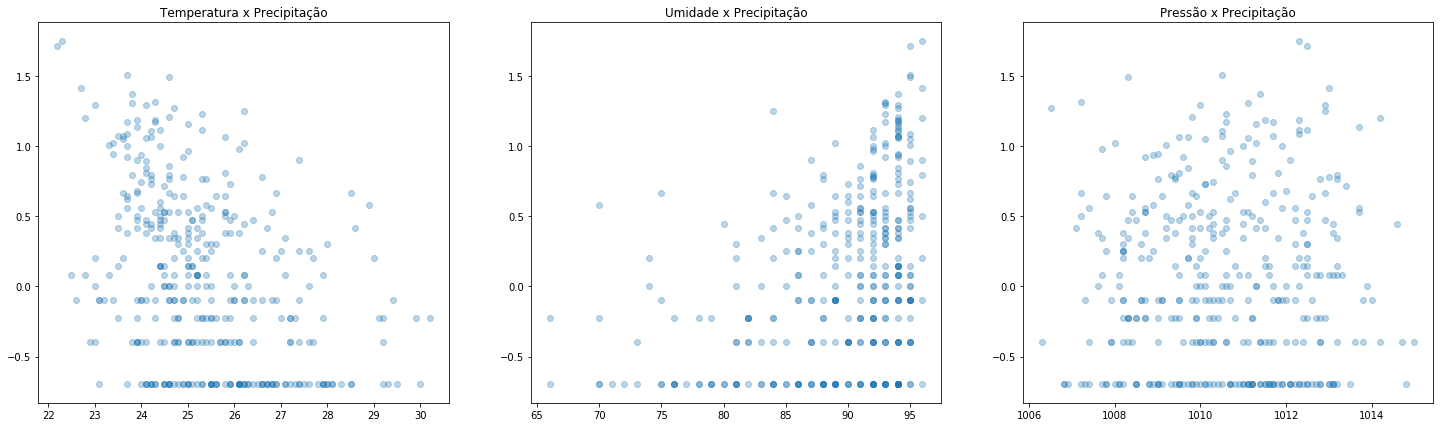

In [123]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(25, 7) 
axs[0].scatter(temperatura1,np.log10(precipitacao1), alpha=0.3);
axs[0].set_title('Temperatura x Precipitação');
axs[1].scatter(umidade1,np.log10(precipitacao1), alpha=0.3);
axs[1].set_title('Umidade x Precipitação');
axs[2].scatter(pressao1,np.log10(precipitacao1), alpha=0.3);
axs[2].set_title('Pressão x Precipitação');

### Correlação entre as variáveis independentes e a variável dependente

Este cálculo é crucial para que se perceba quais variáveis podem, de fato contribuir para o modelo. Essa possível contribuição depende da correlação entre as variáveis independentes escolhidas e a variável dependente a ser calculada

> Cálculo sem usar o logaritmo

In [124]:
print('Correlação entre precipitação e pressão:',(precipitacao1).corr(pressao1))
print('Correlação entre precipitação e umidade:',(precipitacao1).corr(umidade1))
print('Correlação entre precipitação e umidade:',(precipitacao1).corr(temperatura1))

Correlação entre precipitação e pressão: 0.07173739558690949
Correlação entre precipitação e umidade: 0.2668909440242693
Correlação entre precipitação e umidade: -0.3404714001582595


> Cálculo usando o logaritmo

In [125]:
print('Correlação entre precipitação e pressão:', np.log10(precipitacao1).corr(pressao1))
print('Correlação entre precipitação e umidade:', np.log10(precipitacao1).corr(umidade1))
print('Correlação entre precipitação e umidade:',np.log10(precipitacao1).corr(temperatura1))

Correlação entre precipitação e pressão: 0.025288786872702054
Correlação entre precipitação e umidade: 0.3710590857351418
Correlação entre precipitação e umidade: -0.395696050836482


## Plot de tabelas OLS

As tabelas OLS são usadas para que se possa ter uma noção de como os dados se comportam e como se dão cetos parâmetros relevântes para a análise

In [126]:
model = sm.OLS(np.log10(precipitacao1),sm.add_constant(umidade1))
results = model.fit()
results.summary()

/Users/joaopedrochacon/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           precipitacao   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     59.56
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           1.10e-13
Time:                        16:21:06   Log-Likelihood:                -320.32
No. Observations:                 375   AIC:                             644.6
Df Residuals:                     373   BIC:                             652.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4092      0.451     -7.560      0.000      -4.296      -2.522
umid_inst      0.0388      0.005      7.717      0.000       0.029       0.049
==============================================================================
Omnibus:                       25.847   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.227
Skew:                           0.235   Prob(JB):                      0.00221
Kurtosis:                       2.251   Cond. No.                     1.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
model = sm.OLS(precipitacao1,sm.add_constant(umidade1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           precipitacao   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     28.61
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           1.55e-07
Time:                        16:21:07   Log-Likelihood:                -1194.2
No. Observations:                 375   AIC:                             2392.
Df Residuals:                     373   BIC:                             2400.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.5130      4.637     -4.640      0.000     -30.630     -12.395
umid_inst      0.2765      0.052      5.349      0.000       0.175       0.378
==============================================================================
Omnibus:                      381.230   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14008.460
Skew:                           4.420   Prob(JB):                         0.00
Kurtosis:                      31.607   Cond. No.                     1.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
model = sm.OLS(precipitacao1,sm.add_constant(temperatura1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           precipitacao   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     48.91
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           1.25e-11
Time:                        16:21:07   Log-Likelihood:                -1185.0
No. Observations:                 375   AIC:                             2374.
Df Residuals:                     373   BIC:                             2382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.7996      5.094      7.617      0.000      28.783      48.816
temp_inst     -1.4032      0.201     -6.993      0.000      -1.798      -1.009
==============================================================================
Omnibus:                      360.020   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11225.551
Skew:                           4.092   Prob(JB):                         0.00
Kurtosis:                      28.523   Cond. No.                         439.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

___
## Analisando os dias que não tiveram chuvas

##### Análise com log

In [129]:
dados_log_sem_chuva = dados_log[dados_log['precipitacao']==0]
dados_log_sem_chuva.head()

,temp_inst,pressao,umid_inst,precipitacao,vento_vel
time,,,,,
2019-02-08 18:00:00,3.202746,6.915327,4.532599,0.0,4.962845
2019-03-02 18:00:00,3.258097,6.918299,4.488636,0.0,5.231109
2019-03-02 19:00:00,3.198673,6.918201,4.510860,0.0,5.176150
2019-03-10 16:00:00,3.238678,6.917805,4.442651,0.0,5.262690
2019-04-03 11:00:00,3.198673,6.918992,4.553877,0.0,5.099866


In [130]:
temperatura2_log = dados_log_com_chuva['temp_inst']
pressao2_log = dados_log_com_chuva['pressao']
umidade2_log = dados_log_com_chuva['umid_inst']
precipitacao2_log = dados_log_com_chuva['precipitacao']

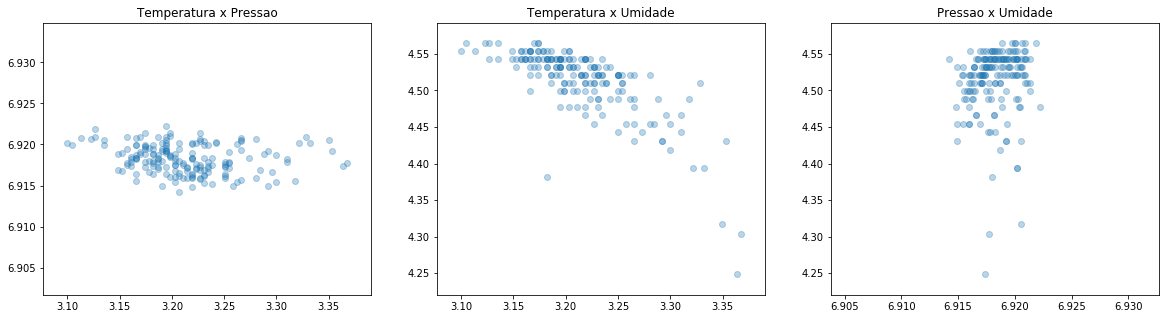

In [182]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20, 5) 
axs[0].scatter(temperatura2_log,pressao2_log, alpha=0.3);
axs[0].set_title('Temperatura x Pressao');
axs[1].scatter(temperatura2_log,umidade2_log, alpha=0.3);
axs[1].set_title('Temperatura x Umidade');
axs[2].scatter(pressao2_log,umidade2_log, alpha=0.3);
axs[2].set_title('Pressao x Umidade');

##### Análise sem log

In [135]:
dados_sem_chuva = dados7[dados7['precipitacao']==0]
dados_sem_chuva.head()

,time,temp_inst,pressao,umid_inst,precipitacao,vento_vel
2526,2019-10-01 10:00:00,24.7,1007.8,92,0,353
2527,2019-10-01 11:00:00,28,1008.5,78,0,35
2528,2019-10-01 12:00:00,30,1009.1,68,0,63
2529,2019-10-01 13:00:00,30.8,1009.7,65,0,64
2530,2019-10-01 14:00:00,31.5,1009.8,55,0,93


In [136]:
tempo2 = dados_sem_chuva['time']
temperatura2 = dados_sem_chuva['temp_inst']
pressao2 = dados_sem_chuva['pressao']
umidade2 = dados_sem_chuva['umid_inst']
precipitacao2 = dados_sem_chuva['precipitacao']

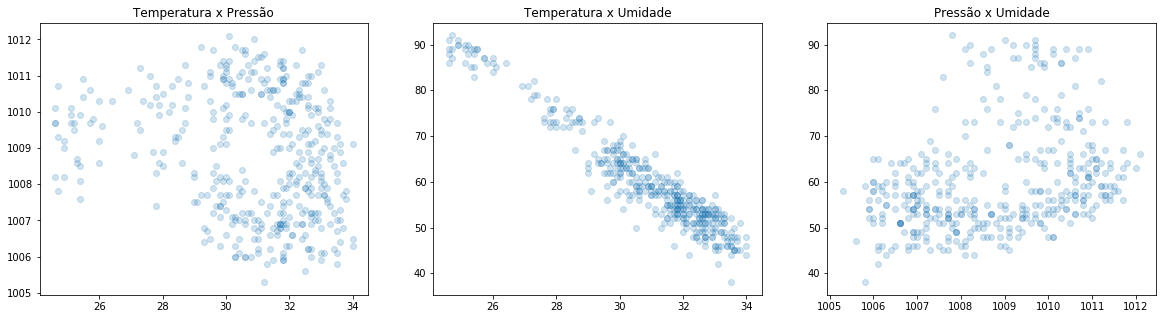

In [181]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20, 5) 
axs[0].scatter(temperatura2,pressao2, alpha=0.2);
axs[0].set_title('Temperatura x Pressão');
axs[1].scatter(temperatura2,umidade2, alpha=0.2);
axs[1].set_title('Temperatura x Umidade');
axs[2].scatter(pressao2,umidade2, alpha=0.2);
axs[2].set_title('Pressão x Umidade');

***Valores de correlação entre as variáveis***

In [138]:
temperatura2 = temperatura2.astype(float)
umidade2 = umidade2.astype(float)
pressao2 = pressao2.astype(float)
print('Correlação entre temperatura e pressão:', temperatura2.corr(pressao2))
print('Correlação entre temperatura e umidade:', temperatura2.corr(umidade2))
print('Correlação entre pressão e umidade:',pressao2.corr(umidade2))

Correlação entre temperatura e pressão: -0.23088202988357032
Correlação entre temperatura e umidade: -0.9590109967695862
Correlação entre pressão e umidade: 0.32779248975521075


## Esclarecendo a mudança de DataSet

Com os dados anteriores, mesmo após muitas manipulações e iterações, as correlações das variáveis independentes com a variável dependente eram muito baixas. A partir dos estudos feitos, era certeza que temperatura, pressão, umidade e velocidade do vento tinham impacto no regime de chuvas, logo, a nossa escolha de variáveis independentes não estava equivocada.

Sabendo disso, foi feito um esforço para que se compreendesse o motivo do comportamento incoerente do nosso DataSet em comparação com as pesquisas feitas anteriormente. Ao fim, chegou-se à hipótese de que a própria estação de coleta de dados poderia ser um problema, dado que as mesmas se encontravam em cidades não tão relevantes dentro do país.

Dessa forma, para tentar solucionar o problema, uma estação em São Paulo, a maior e mais importante cidade do Brasil foi selecionada, com base na ideia de que sua relevância significaria dados de maior qualidade quando comparados com os anteriores. O resultado desta troca foi satisfátorio, dado como as correlações das variáveis independentes com a variável dependente aumentaram consideravelmente, tanto numéricamente por meio do cálculo ca correlação quanto visualmente, por meio dos Scatter Plots realizados 

____
## Realizando as regressões

In [139]:
### Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [140]:
Y = variacao['precipitacao_t']
X3 = variacao[['temperatura_t', 'pressao_t', 'umidade_t','vento_t']]

In [141]:
results1 = regress(X3.values, Y.values)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     2.524
Date:                Tue, 19 Nov 2019   Prob (F-statistic):             0.0449
Time:                        16:21:30   Log-Likelihood:                -355.78
No. Observations:                 116   AIC:                             721.6
Df Residuals:                     111   BIC:                             735.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -178.1848    257.122     -0.693      0.490    -687.690     331.320
x1             0.6035      0.581      1.039      0.301      -0.548       1.755
x2             0.1767      0.254      0.695      0.488      -0.327       0.680
x3             0.0738      0.128      0.575      0.566      -0.180       0.328
x4            -0.0052      0.010     -0.521      0.603      -0.025       0.015
==============================================================================
Omnibus:                      182.013   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12116.524
Skew:                           6.129   Prob(JB):                         0.00
Kurtosis:                      51.545   Cond. No.                     5.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X3.values, Y.values, test_size=0.2, random_state=0)

In [144]:
results2 = regress(X_train, y_train)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     2.049
Date:                Tue, 19 Nov 2019   Prob (F-statistic):             0.0945
Time:                        16:21:30   Log-Likelihood:                -290.31
No. Observations:                  92   AIC:                             590.6
Df Residuals:                      87   BIC:                             603.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -233.2477    320.563     -0.728      0.469    -870.401     403.906
x1             0.6726      0.745      0.903      0.369      -0.808       2.154
x2             0.2311      0.317      0.729      0.468      -0.399       0.861
x3             0.0819      0.162      0.506      0.614      -0.240       0.404
x4            -0.0057      0.012     -0.458      0.648      -0.030       0.019
==============================================================================
Omnibus:                      146.321   Durbin-Watson:                   2.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6837.529
Skew:                           5.696   Prob(JB):                         0.00
Kurtosis:                      43.668   Cond. No.                     5.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Regressão usando Regressão Linear Múltipla**

In [145]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [146]:
p = 0
while p < len(df['Predicted']):
    if df['Predicted'][p] < 0:
        df['Predicted'][p] = 0
    
    p += 1

In [147]:
df.head(10);

In [148]:
lista_actual = list(df['Actual'])
lista_predicted = list(df['Predicted'])

erros = []
k = 0
while k < len(lista_actual):
    erros.append(abs(lista_actual[k] - lista_predicted[k]))
    k += 1
    
print('O erro médio é:',np.mean(erros))
print('O desvio padrão do erro é:', np.std(erros))

O erro médio é: 1.9204691779944965
O desvio padrão do erro é: 1.8703408773127406


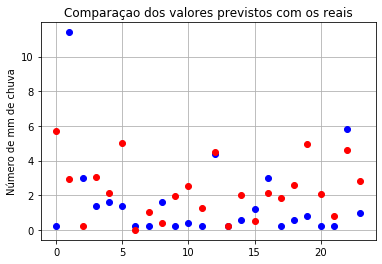

In [177]:
a = np.arange(0,24,1)
plt.plot(a, df['Actual'], 'bo')
plt.plot(a, df['Predicted'], 'ro')
plt.title('Comparaçao dos valores previstos com os reais')
plt.ylabel('Número de mm de chuva')
plt.grid(True)
plt.show()

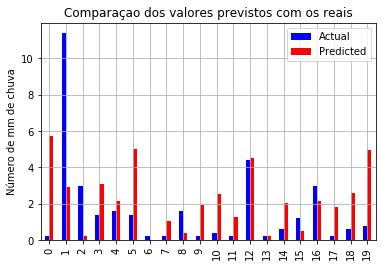

In [175]:
df.iloc[:20,:].plot(kind='bar', color=('blue', 'red'), legend=True );
plt.title('Comparaçao dos valores previstos com os reais')
plt.ylabel('Número de mm de chuva')
plt.grid(True)

**Regressão usando Random Forrest Regressor**

In [160]:
from sklearn.ensemble import RandomForestRegressor

# Setando 100 árvores de decisão
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Treinando o modelo
rf.fit(X_train, y_train);

In [161]:
# Fazendo as predições
predictions = rf.predict(X_test)

In [162]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

In [163]:
p = 0
while p < len(df2['Predicted']):
    if df2['Predicted'][p] < 0:
        df2['Predicted'][p] = 0
    
    p += 1

In [164]:
df2.head(10);

In [165]:
lista_actual2 = list(df2['Actual'])
lista_predicted2 = list(df2['Predicted'])

erros2 = []
k = 0
while k < len(lista_actual2):
    erros2.append(abs(lista_actual2[k] - lista_predicted2[k]))
    k += 1
    
print('O erro médio é:',np.mean(erros2))
print('O desvio padrão do erro é:', np.std(erros2))

O erro médio é: 2.1599999999999997
O desvio padrão do erro é: 2.1427705585681975


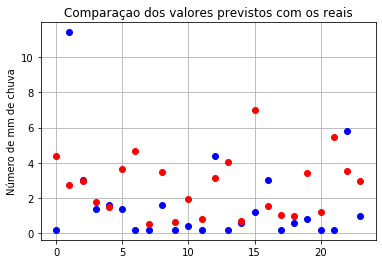

In [173]:
plt.plot(a, df2['Actual'], 'bo')
plt.plot(a, df2['Predicted'], 'ro')
plt.title('Comparaçao dos valores previstos com os reais')
plt.ylabel('Número de mm de chuva')
plt.grid(True)
plt.show()

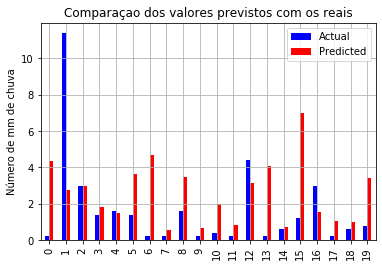

In [169]:
df2.iloc[:20,:].plot(kind='bar', color=('blue', 'red'), legend=True );
plt.title('Comparaçao dos valores previstos com os reais')
plt.ylabel('Número de mm de chuva')
plt.grid(True)